<div style="background-color: #E3F2FD; padding: 20px; border-radius: 10px; text-align: center;">
    <h1 style="color: #1A237E;">💸 Financial Insights: Comprehensive Analysis of Loan Data 📊</h1>
</div>



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/pooja pawar/EDUTECH  - DATA  ANALYST COURSE/DATASET FOR PYTHON PROJECT/FINANCE/Bank Financial Loan Analysis/financial_loan.csv")
df.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


<div style="background-color: #E3F2FD; padding: 20px; border-radius: 10px;">
    <h1 style="color: #004D40; text-align: left; font-size: 1.5em;">Data overview</h1>
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [5]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f'{column} = {null_count} ')

id = 0 
address_state = 0 
application_type = 0 
emp_length = 0 
emp_title = 1438 
grade = 0 
home_ownership = 0 
issue_date = 0 
last_credit_pull_date = 0 
last_payment_date = 0 
loan_status = 0 
next_payment_date = 0 
member_id = 0 
purpose = 0 
sub_grade = 0 
term = 0 
verification_status = 0 
annual_income = 0 
dti = 0 
installment = 0 
int_rate = 0 
loan_amount = 0 
total_acc = 0 
total_payment = 0 


<div style="background-color: #E3F2FD; padding: 20px; border-radius: 10px;">
    <h1 style="color: #004D40; text-align: left; font-size: 1.5em;">Exploratory data analysis - KPI</h1>
</div>

### Total Loan Applications

In [6]:
df['id'].nunique()

38576

### Total Funded Amount

In [7]:
df['loan_amount'].sum()

435757075

### Total Amount Received

In [8]:
df['total_payment'].sum()

473070933

### Average Interest Rates

In [9]:
df['int_rate'].mean()*100

12.048831397760265

### Average Debt to income Ratio

In [10]:
df['dti'].mean()*100

13.327433119037742

## Good Loan VS Bad Loan KPI'S

### Good Loan VS Bad Loan %

In [11]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

In [12]:
df['loan_status'].count()

38576

In [13]:
df['loan_status'].value_counts().sort_values(ascending=False)

Fully Paid     32145
Charged Off     5333
Current         1098
Name: loan_status, dtype: int64

In [14]:
x = df["loan_status"].value_counts()
y = df["loan_status"].value_counts().sum()

z = (x/y)*100
z

Fully Paid     83.329013
Charged Off    13.824658
Current         2.846329
Name: loan_status, dtype: float64

In [15]:
Good_Loan = 83.329013 +  2.846329
Good_Loan

86.175342

In [16]:
Bad_Loan =  13.824658
Bad_Loan

13.824658

### Good Loan Funded Amount VS Bad Loan Funded Amount

In [17]:
# Define good and bad loan categories
good_loan_status = ["Fully Paid", "Current"]
bad_loan_status = ["Charged Off"]

# Calculate the total loan amount for good loans
good_loan_amount = df[df['loan_status'].isin(good_loan_status)]['loan_amount'].sum()

# Calculate the total loan amount for bad loans
bad_loan_amount = df[df['loan_status'].isin(bad_loan_status)]['loan_amount'].sum()

print("Total Loan Amount for Good Loans:", good_loan_amount)
print("Total Loan Amount for Bad Loans:", bad_loan_amount)


Total Loan Amount for Good Loans: 370224850
Total Loan Amount for Bad Loans: 65532225


### Good Loan Received Amount VS Bad Loan Received Amount

In [18]:
# Define good and bad loan categories
good_loan_status = ["Fully Paid", "Current"]
bad_loan_status = ["Charged Off"]

# Calculate the total payment for good loans
good_loan_payment = df[df['loan_status'].isin(good_loan_status)]['total_payment'].sum()

# Calculate the total payment for bad loans
bad_loan_payment = df[df['loan_status'].isin(bad_loan_status)]['total_payment'].sum()

print("Total Payment for Good Loans:", good_loan_payment)
print("Total Payment for Bad Loans:", bad_loan_payment)


Total Payment for Good Loans: 435786170
Total Payment for Bad Loans: 37284763


### Good Loan Avg.Interest Rate VS Bad Loan Avg.Interest Rate

In [19]:
# Define good and bad loan categories
good_loan_status = ["Fully Paid", "Current"]
bad_loan_status = ["Charged Off"]

# Calculate the average interest rate for good loans
good_loan_avg_int_rate = df[df['loan_status'].isin(good_loan_status)]['int_rate'].mean()

# Calculate the average interest rate for bad loans
bad_loan_avg_int_rate = df[df['loan_status'].isin(bad_loan_status)]['int_rate'].mean()

print("Average Interest Rate for Good Loans:", good_loan_avg_int_rate*100)
print("Average Interest Rate for Bad Loans:", bad_loan_avg_int_rate*100)


Average Interest Rate for Good Loans: 11.755295250127846
Average Interest Rate for Bad Loans: 13.878574910931931


### Good Loan Avg. Debt to income Ratio VS Bad Loan Avg.Debt to income Ratio

In [20]:
# Define good and bad loan categories
good_loan_status = ["Fully Paid", "Current"]
bad_loan_status = ["Charged Off"]

# Calculate the average DTI for good loans
good_loan_avg_dti = df[df['loan_status'].isin(good_loan_status)]['dti'].mean()

# Calculate the average DTI for bad loans
bad_loan_avg_dti = df[df['loan_status'].isin(bad_loan_status)]['dti'].mean()

print("Average DTI for Good Loans:", good_loan_avg_dti*100)
print("Average DTI for Bad Loans:", bad_loan_avg_dti*100)


Average DTI for Good Loans: 13.218777486989744
Average DTI for Bad Loans: 14.004732795799738


## Monthly Trend Analysis

### Total Applications By Month

In [21]:
df['issue_date'].count()

38576

In [22]:
print(df['issue_date'].dtype)

object


In [24]:
df['issue_date'] = pd.to_datetime(df['issue_date'])

# Extract month from the issue_date and create a new column for month names
df['month'] = df['issue_date'].dt.strftime('%B')  # Get full month name

# Group by month names and count the number of IDs
monthly_id_count = df.groupby('month')['id'].count().reset_index()

# Optional: Rename columns for better understanding
monthly_id_count.columns = ['month', 'id_count']

# Sort the months to ensure they are in order
monthly_id_count['month'] = pd.Categorical(monthly_id_count['month'], 
                                            categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                        'July', 'August', 'September', 'October', 'November', 'December'], 
                                            ordered=True)

monthly_id_count = monthly_id_count.sort_values('month')

# Display the result
print(monthly_id_count)


C:\Users\pooja pawar\Desktop\aniket\Data Analyst\Python_Files\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25-02-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\pooja pawar\Desktop\aniket\Data Analyst\Python_Files\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17-07-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\pooja pawar\Desktop\aniket\Data Analyst\Python_Files\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-11-2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\pooja pawar\Desktop\aniket\Data Analyst\

       month  id_count
3    January         2
2   February         4
5        May         1
4       July       253
0     August      1561
8  September      4706
7    October     11197
6   November     20851
1   December         1


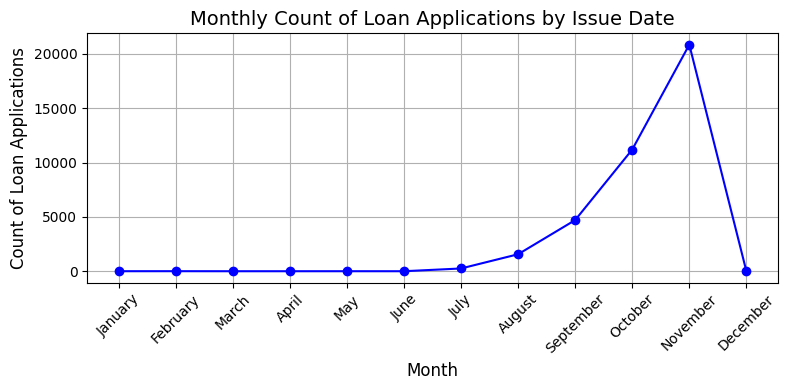

In [25]:

# Create a complete list of months
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

# Extract month names from the issue_date and create a new column
df['month'] = df['issue_date'].dt.strftime('%B')

# Group by month names and count the number of IDs
monthly_id_count = df.groupby('month')['id'].count().reindex(months, fill_value=0).reset_index()

# Rename columns for better understanding
monthly_id_count.columns = ['month', 'id_count']

# Plotting the line chart
plt.figure(figsize=(8, 4))
plt.plot(monthly_id_count['month'], monthly_id_count['id_count'], marker='o', linestyle='-', color='b')

# Adding title and labels
plt.title('Monthly Count of Loan Applications by Issue Date', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Count of Loan Applications', fontsize=12)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show grid
plt.grid()

# Display the line chart
plt.tight_layout()
plt.show()



### Total Loan Amount By Month

In [26]:
# Group by the 'month' column and sum the 'loan_amount'
monthly_loan_amount = df.groupby('month')['loan_amount'].sum().reset_index()

# Sort the months in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_loan_amount['month'] = pd.Categorical(monthly_loan_amount['month'], categories=month_order, ordered=True)

# Sort the DataFrame by month
monthly_loan_amount = monthly_loan_amount.sort_values('month')

# Display the resulting DataFrame
print(monthly_loan_amount)


       month  loan_amount
3    January         6500
2   February        36550
5        May        12000
4       July      2232675
0     August     14385275
8  September     46295750
7    October    119568600
6   November    253214725
1   December         5000


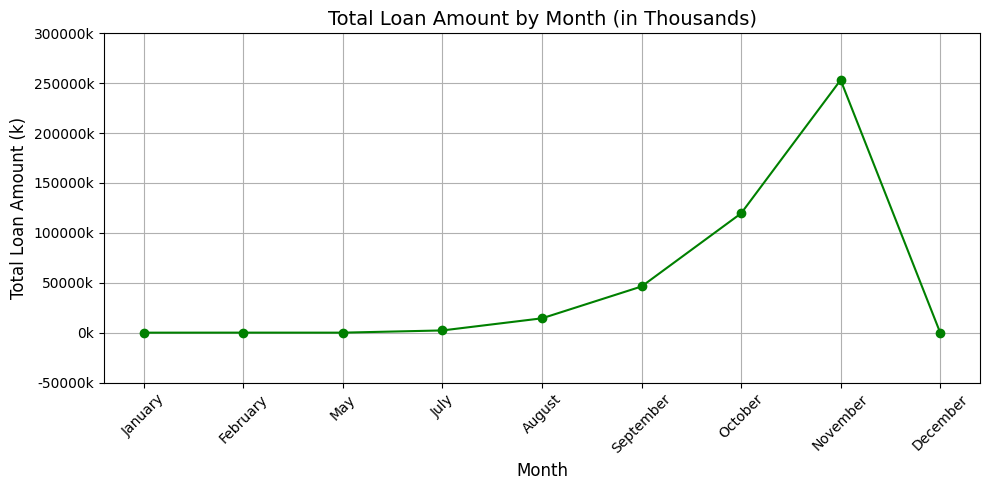

In [27]:
import matplotlib.ticker as ticker
# Create the line chart for loan amounts by month
plt.figure(figsize=(10, 5))
plt.plot(monthly_loan_amount['month'], monthly_loan_amount['loan_amount'] / 1000, marker='o', linestyle='-', color='g')

# Adding title and labels
plt.title('Total Loan Amount by Month (in Thousands)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Loan Amount (k)', fontsize=12)

# Format the y-axis to show values in thousands (k) and disable scientific notation
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.yticks(ticks=plt.yticks()[0], labels=[f'{int(y)}k' for y in plt.yticks()[0]])

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show grid
plt.grid()

# Display the line chart
plt.tight_layout()
plt.show()


### Total Payment Received By Month

In [28]:
# Group by month and calculate the total payment
total_payment_by_month = df.groupby('month')['total_payment'].sum().reset_index()

# Display the aggregated data
print(total_payment_by_month)


       month  total_payment
0     August       14065428
1   December           5863
2   February          23460
3    January           7774
4       July        2227604
5        May           3522
6   November      278244337
7    October      128148384
8  September       50344561


## Regional Analysis

### Top 5 State By Total Applications 

In [29]:
df['address_state'].nunique()

50

In [30]:
df['address_state'].value_counts().head(5)

CA    6894
NY    3701
FL    2773
TX    2664
NJ    1822
Name: address_state, dtype: int64

### Top 5 state By Total Loan Amount 

In [31]:
# Group by state and calculate the total loan amount
total_loan_by_state = df.groupby('address_state')['loan_amount'].sum().reset_index()

# Get the top 5 states by total loan amount
top5_loan_by_state = total_loan_by_state.nlargest(5, 'loan_amount')

# Display the aggregated data
print(top5_loan_by_state)



   address_state  loan_amount
4             CA     78484125
33            NY     42077050
42            TX     31236650
9             FL     30046125
30            NJ     21657475


### Top 5 state By Total Payment Amount 

In [32]:
# Group by state and calculate the total payment amount
total_payment_received_by_state = df.groupby('address_state')['total_payment'].sum().reset_index()

# Get the top 5 states by total payment amount
top5_payment_by_state = total_payment_received_by_state.nlargest(5, 'total_payment')

# Display the aggregated data
print(top5_payment_by_state)



   address_state  total_payment
4             CA       83901234
33            NY       46108181
42            TX       34392715
9             FL       31601905
30            NJ       23425159


## Loan Term Analysis

### Total Applications By Loan Term

In [33]:
df['term'].nunique()

2

In [34]:
df['term'].value_counts()

 36 months    28237
 60 months    10339
Name: term, dtype: int64

### Loan Amount By Loan Term

In [37]:
# Group by Loan term and calculate the total loan amount
total_loan_by_term = df.groupby('term')['loan_amount'].sum().reset_index()

# Display the aggregated data
print(total_loan_by_term)

         term  loan_amount
0   36 months    273041225
1   60 months    162715850


### Total Payment By Loan Term

In [38]:
# Group by Loan term and calculate the total loan amount
total_pay_by_term = df.groupby('term')['total_payment'].sum().reset_index()

# Display the aggregated data
print(total_pay_by_term)

         term  total_payment
0   36 months      294709458
1   60 months      178361475


## Employee Experience Analysis

### Total Applications By Employee Experience

In [40]:
df['emp_length'].value_counts()

10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: emp_length, dtype: int64

### Loan Amount By Employee Experience

In [41]:
total_loan_by_exp = df.groupby('emp_length')['loan_amount'].sum().reset_index()

print(total_loan_by_exp)

   emp_length  loan_amount
0      1 year     32883125
1   10+ years    116115950
2     2 years     44967975
3     3 years     43937850
4     4 years     37600375
5     5 years     36973625
6     6 years     25612650
7     7 years     20811725
8     8 years     17558950
9     9 years     15084225
10   < 1 year     44210625


### Total Payment By Employee Experience

In [44]:
total_pay_by_exp = df.groupby('emp_length')['total_payment'].sum().reset_index()

print(total_pay_by_exp)

   emp_length  total_payment
0      1 year       35498348
1   10+ years      125871616
2     2 years       49206961
3     3 years       47551832
4     4 years       40964850
5     5 years       40397571
6     6 years       27908658
7     7 years       22584136
8     8 years       19025777
9     9 years       16516173
10   < 1 year       47545011


## Loan Purpose Analysis

### Total Applicants By Purpose

In [45]:
df['purpose'].value_counts()

Debt consolidation    18214
credit card            4998
other                  3824
home improvement       2876
major purchase         2110
small business         1776
car                    1497
wedding                 928
medical                 667
moving                  559
house                   366
vacation                352
educational             315
renewable_energy         94
Name: purpose, dtype: int64

### Loan Amount By Purpose

In [46]:
total_loan_by_purpose = df.groupby('purpose')['loan_amount'].sum().reset_index()

print(total_loan_by_purpose)

               purpose  loan_amount
0   Debt consolidation    232459675
1                  car     10223575
2          credit card     58885175
3          educational      2161650
4     home improvement     33350775
5                house      4824925
6       major purchase     17251600
7              medical      5533225
8               moving      3748125
9                other     31155750
10    renewable_energy       845750
11      small business     24123100
12            vacation      1967950
13             wedding      9225800


### Total Payment By Purpose

In [47]:
total_pay_by_purpose = df.groupby('purpose')['total_payment'].sum().reset_index()

print(total_pay_by_purpose)

               purpose  total_payment
0   Debt consolidation      253801871
1                  car       11324914
2          credit card       65214084
3          educational        2248380
4     home improvement       36380930
5                house        5185538
6       major purchase       18676927
7              medical        5851372
8               moving        3999899
9                other       33289676
10    renewable_energy         898931
11      small business       23814817
12            vacation        2116738
13             wedding       10266856


## Home Ownership Analysis

### Total Applicants By Home Ownership

In [48]:
df['home_ownership'].value_counts()

RENT        18439
MORTGAGE    17198
OWN          2838
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

### Total Loan By Home Ownership

In [49]:
df.groupby('home_ownership')['loan_amount'].sum()

home_ownership
MORTGAGE    219329150
NONE            16800
OTHER         1044975
OWN          29597675
RENT        185768475
Name: loan_amount, dtype: int64

In [50]:
df.groupby('home_ownership')['total_payment'].sum()

home_ownership
MORTGAGE    238474438
NONE            19053
OTHER         1025257
OWN          31729129
RENT        201823056
Name: total_payment, dtype: int64